## Carga de datos

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import tensorflow as tf
import numpy as np
import pathlib  # Agregar esta importación

# Usaremos el dataset MNIST
dataset_url = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz"
data_dir = tf.keras.utils.get_file('mnist.npz', origin=dataset_url, untar=False)
data_dir = pathlib.Path(data_dir)  # La ruta al archivo descargado

# Cargar el dataset MNIST desde el archivo npz
data = np.load(data_dir)

# Obtener las imágenes y etiquetas de entrenamiento y prueba
x_train, y_train = data['x_train'], data['y_train']
x_test, y_test = data['x_test'], data['y_test']

# Verificar cuántas imágenes hay en total
image_count_train = len(x_train)
image_count_test = len(x_test)

print(f"Total de imágenes en entrenamiento: {image_count_train}")
print(f"Total de imágenes en test: {image_count_test}")

Total de imágenes en entrenamiento: 60000
Total de imágenes en test: 10000


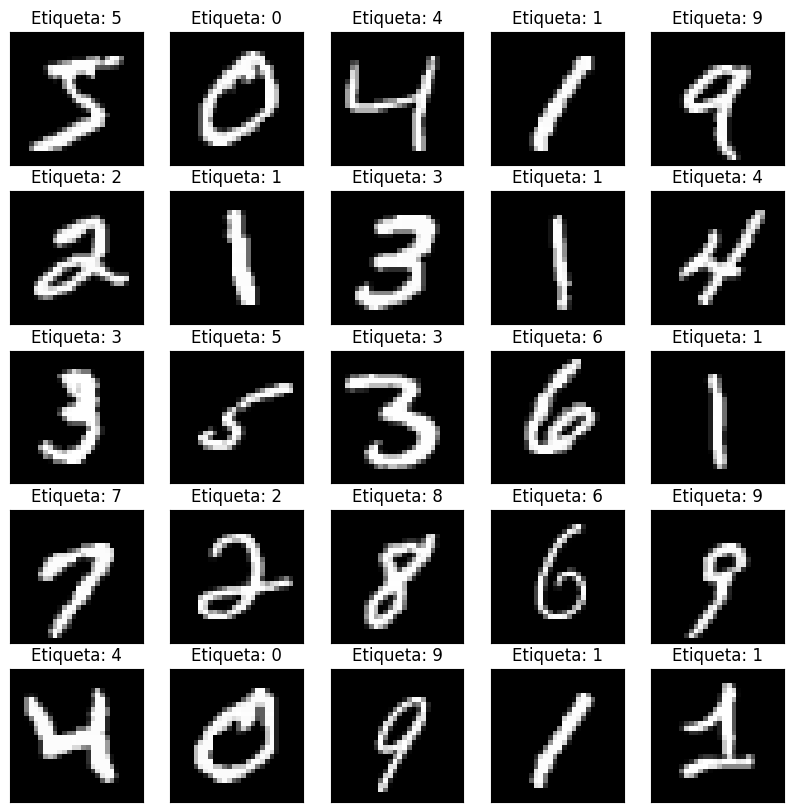

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Cargar el dataset MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalizar los datos
x_train, x_test = x_train / 255.0, x_test / 255.0

# Ver algunas imágenes del conjunto de entrenamiento
def mostrar_imagenes(x, y, num_imagenes=25):
    # Definir la cantidad de filas y columnas para la cuadrícula
    filas = 5
    columnas = 5

    # Crear una figura para las imágenes
    plt.figure(figsize=(10, 10))

    # Mostrar imágenes en la cuadrícula
    for i in range(num_imagenes):
        plt.subplot(filas, columnas, i + 1)  # Posición en la cuadrícula
        plt.xticks([])  # Ocultar las marcas en el eje x
        plt.yticks([])  # Ocultar las marcas en el eje y
        plt.imshow(x[i], cmap='gray')  # Mostrar imagen
        plt.title(f"Etiqueta: {y[i]}")  # Mostrar la etiqueta de la imagen

    plt.show()

# Mostrar un conjunto de imágenes
mostrar_imagenes(x_train, y_train, num_imagenes=25)

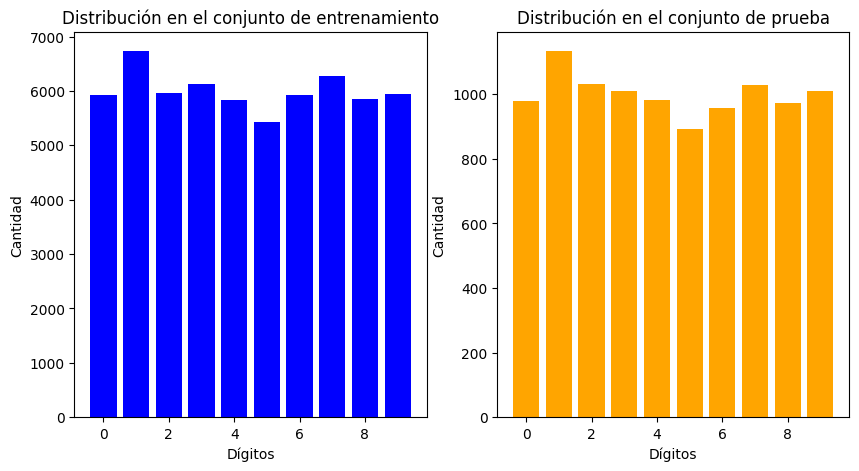

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Cargar el dataset MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalizar los datos
x_train, x_test = x_train / 255.0, x_test / 255.0

# Contar la cantidad de muestras por cada dígito en el conjunto de entrenamiento
unique, counts = np.unique(y_train, return_counts=True)
train_distribution = dict(zip(unique, counts))

# Contar la cantidad de muestras por cada dígito en el conjunto de prueba
unique, counts = np.unique(y_test, return_counts=True)
test_distribution = dict(zip(unique, counts))

# Graficar la distribución de los datos
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(train_distribution.keys(), train_distribution.values(), color='blue')
plt.xlabel("Dígitos")
plt.ylabel("Cantidad")
plt.title("Distribución en el conjunto de entrenamiento")

plt.subplot(1, 2, 2)
plt.bar(test_distribution.keys(), test_distribution.values(), color='orange')
plt.xlabel("Dígitos")
plt.ylabel("Cantidad")
plt.title("Distribución en el conjunto de prueba")

plt.show()


In [ ]:
for digit, count in sorted(train_distribution.items()):
    print(f"Dígito {digit}: {count} imágenes")


Dígito 0: 5923 imágenes
Dígito 1: 6742 imágenes
Dígito 2: 5958 imágenes
Dígito 3: 6131 imágenes
Dígito 4: 5842 imágenes
Dígito 5: 5421 imágenes
Dígito 6: 5918 imágenes
Dígito 7: 6265 imágenes
Dígito 8: 5851 imágenes
Dígito 9: 5949 imágenes


In [ ]:
# Normalización de los datos
x_train, x_test = x_train / 255.0, x_test / 255.0

# Redimensionar las imágenes para que tengan la forma (muestras, 28, 28, 1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos de entrenamiento en entrenamiento y validación
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=42)

# Ver el tamaño de los conjuntos de datos
print(f"Entrenamiento: {x_train.shape}, Validación: {x_val.shape}, Test: {x_test.shape}")

Entrenamiento: (51000, 28, 28, 1), Validación: (9000, 28, 28, 1), Test: (10000, 28, 28, 1)


In [ ]:
from tensorflow.keras import layers, models

# Construcción del modelo CNN
model = models.Sequential([
    # Capa convolucional 1
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # Capa convolucional 2
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Capa convolucional 3
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Aplanamiento para la capa densa
    layers.Flatten(),

    # Capa densa
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.25),

    # Capa de salida con 10 neuronas (uno por cada dígito)
    layers.Dense(10, activation='softmax')
])

# Mostrar la arquitectura del modelo
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 11, 11, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 3, 3, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,906 (128.54 KB)

 Trainable params: 32,906 (128.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compilación del modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Entrenamiento del modelo
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.3150 - loss: 1.8456 - val_accuracy: 0.8689 - val_loss: 0.4283
Epoch 2/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8713 - loss: 0.4187 - val_accuracy: 0.9266 - val_loss: 0.2429
Epoch 3/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9186 - loss: 0.2609 - val_accuracy: 0.9437 - val_loss: 0.1903
Epoch 4/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9387 - loss: 0.2065 - val_accuracy: 0.9576 - val_loss: 0.1472
Epoch 5/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9460 - loss: 0.1724 - val_accuracy: 0.9611 - val_loss: 0.1305
Epoch 6/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9539 - loss: 0.1526 - val_accuracy: 0.9630 - val_loss: 0.1235
Epoch 7/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9561 - loss: 0.1401 - val_accuracy: 0.9654 - val_loss: 0.1103
Epoch 8/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9620 - loss: 0.1204 - val_accuracy: 0.

In [ ]:
# Evaluación en conjunto de prueba
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9719 - loss: 0.0915
Precisión en el conjunto de prueba: 0.9769


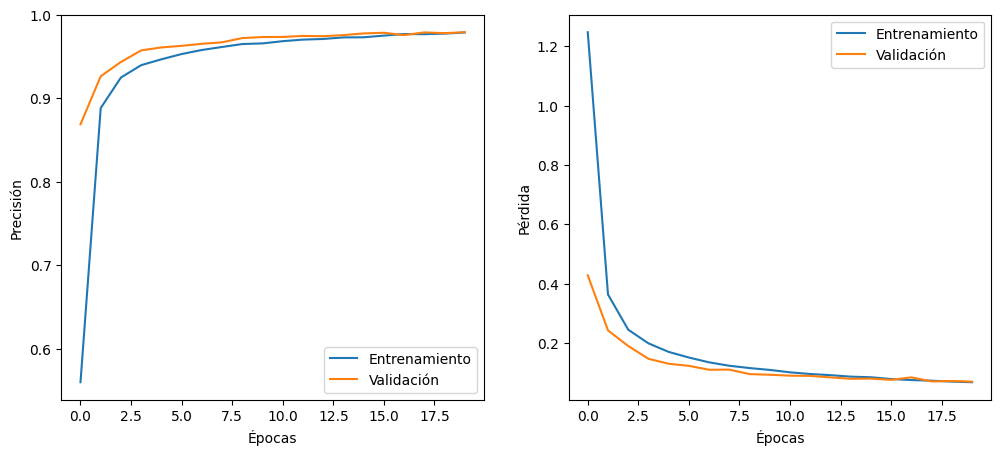

In [ ]:
# Visualización de la precisión y la pérdida
def plot_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Entrenamiento')
    plt.plot(history.history['val_loss'], label='Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()

    plt.show()

# Mostrar las gráficas
plot_history(history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


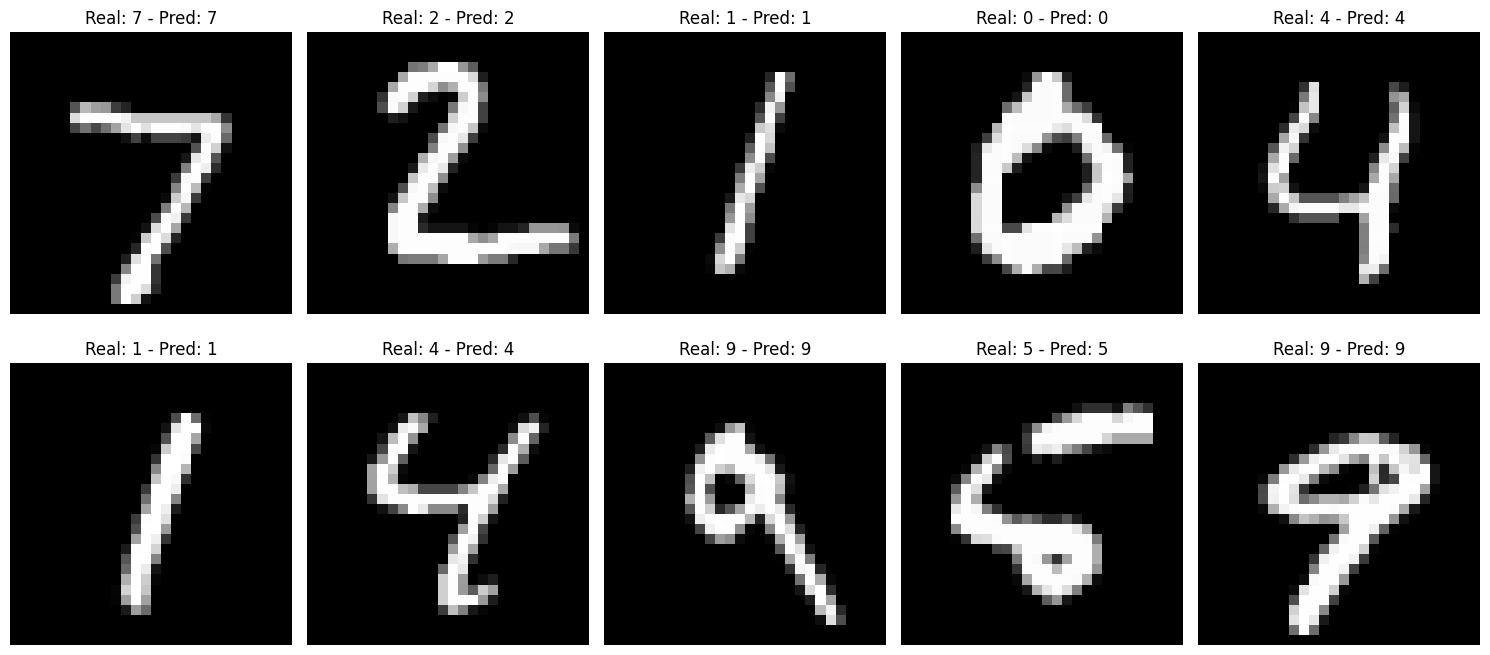

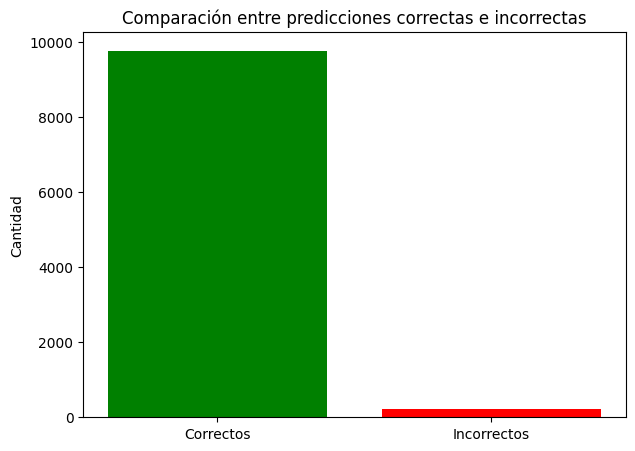

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Hacer predicciones sobre el conjunto de prueba
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = y_test  # No es necesario hacer np.argmax() aquí, ya que y_test es un vector de enteros

# Comparar las predicciones con las etiquetas reales
correct_predictions = predicted_labels == true_labels
incorrect_predictions = ~correct_predictions

# Graficar los primeros 10 resultados con predicciones y etiquetas reales
fig, axes = plt.subplots(2, 5, figsize=(15, 7))
axes = axes.ravel()

for i in range(10):
    ax = axes[i]
    ax.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Real: {true_labels[i]} - Pred: {predicted_labels[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

# Graficar la cantidad de aciertos y desaciertos
correct_count = np.sum(correct_predictions)
incorrect_count = np.sum(incorrect_predictions)

fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(["Correctos", "Incorrectos"], [correct_count, incorrect_count], color=["green", "red"])
ax.set_title("Comparación entre predicciones correctas e incorrectas")
ax.set_ylabel("Cantidad")
plt.show()

In [ ]:
# O en formato .keras (más reciente y específico de TensorFlow)
model.save("modelo_mnist.h5")